In [1]:
import os
import numpy as np
import pandas as pd
import random
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

import scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'Figure7/output_fig7/'

from scripts.visualization import MyVisualization

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

In [3]:
dep_pro_stats_file = 'Figure7/output_fig7/adjusted_rand_index_stats_dep_protein_clustering_comparison_combined_D5_D6.csv'
dep_rna_stats_file = 'Figure7/output_fig7/adjusted_rand_index_stats_dep_rna_clustering_comparison_combined_D5_D6.csv'
pro_rna_stats_file = 'Figure6/output_fig6/adjusted_rand_index_stats_protein_rna_clustering_comparison.csv'

dep_pro_file = 'Figure7/output_fig7/adjusted_rand_scores_dep_protein_clustering_comparison_combined_D5_D6.csv'
dep_rna_file = 'Figure7/output_fig7/adjusted_rand_scores_dep_rna_clustering_comparison_combined_D5_D6.csv'
pro_rna_file = 'Figure6/output_fig6/adjusted_rand_scores_protein_rna_clustering_comparison.csv'
dep_pro_stats_df = pd.read_csv(dep_pro_stats_file, index_col=0).dropna(axis=0)
dep_rna_stats_df = pd.read_csv(dep_rna_stats_file, index_col=0).dropna(axis=0)
pro_rna_stats_df = pd.read_csv(pro_rna_stats_file, index_col=0).dropna(axis=0)
dep_pro_df = pd.read_csv(dep_pro_file, index_col=0)
dep_rna_df = pd.read_csv(dep_rna_file, index_col=0)
pro_rna_df = pd.read_csv(pro_rna_file, index_col=0)

In [4]:
dep_pro_df

,D1,D2,D3,D4,D5+D6
ARI score,NaN,NaN,NaN,NaN,NaN
P1,-0.0188840971794391,-0.06609614954227191,0.4721514531862827,-0.06423966155143075,-0.07919790277330635
P2,-0.08746697974757851,-0.059657800434058446,0.21045721787773275,0.006801032565528197,-0.06649395509499137
P3,0.04852668967932363,-0.06180214381420277,-0.06739010395409695,0.010031376680484622,-0.005905110975361434
P4,-0.11131237583265163,-0.06643365629256509,-0.11108252224755787,0.26338995823279004,-0.042462894792374965
P5,-0.013033175355450236,0.10592788755347321,-0.050716863357066225,-0.024608286071325577,0.2631427750646366
Cluster Matching,NaN,NaN,NaN,NaN,NaN
P1,NaN,NaN,paired,NaN,NaN
P2,NaN,NaN,paired,paired,NaN
P3,paired,NaN,NaN,paired,paired


In [5]:
dep_pro_status_df = dep_pro_df.iloc[dep_pro_df.shape[0]//2+1:,:]
dep_pro_df = dep_pro_df.iloc[1:dep_pro_df.shape[0]//2,:].astype(float)

dep_rna_status_df = dep_rna_df.iloc[dep_rna_df.shape[0]//2+1:,:]
dep_rna_df = dep_rna_df.iloc[1:dep_rna_df.shape[0]//2,:].astype(float)

pro_rna_status_df = pro_rna_df.iloc[pro_rna_df.shape[0]//2+1:,:]
pro_rna_df = pro_rna_df.iloc[1:pro_rna_df.shape[0]//2,:].astype(float)

In [6]:
rna_clusters_l = dep_rna_df.index.tolist()
protein_clusters_l = dep_pro_df.index.tolist()
dependency_clusters_l = dep_pro_df.columns.tolist()
clusters_l = rna_clusters_l + protein_clusters_l+ dependency_clusters_l
clusters_l

['R1',
 'R2',
 'R3',
 'R4',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5+D6']

In [7]:
clusters_df = pd.DataFrame(index=clusters_l, columns=['group', 'color'])
clusters_df['group'] = [0]*len(rna_clusters_l) + [1]*len(protein_clusters_l) + [2]*len(dependency_clusters_l)
for c in clusters_l:
    clusters_df.loc[c, 'color'] = MyVisualization.feat_colors_dic['Cluster'][c]
clusters_df

,group,color
R1,0,#10118C
R2,0,#7FCBFF
R3,0,#FF785C
R4,0,#F7E72F
P1,1,#CD41AC
P2,1,#8AADAA
P3,1,#6C498A
P4,1,#16580A
P5,1,#BC6764
D1,2,#A8E2EF


In [8]:
def create_edges(stats_df, ari_scores_df, similarity_status_df, index_l):
    similarity_status_df.index = index_l
    qval_df = stats_df.iloc[stats_df.shape[0]//2:,:]
    # qval_df[qval_df> 0.25] = np.nan
    qval_df[similarity_status_df.isna()] = np.nan
    qval_melt_df = pd.melt(qval_df.reset_index(), id_vars='index')
    qval_melt_df = qval_melt_df.dropna(axis=0)
    qval_melt_df.columns = ['n1', 'n2', 'q-val']
    qval_melt_df['color'] = '#d4d4d4'
    qval_melt_df['weight'] = np.nan
    for i, row in qval_melt_df.iterrows():
        qval_melt_df.loc[i, 'weight'] = round(ari_scores_df.loc[row['n1'], row['n2']], 3)
        if qval_df.loc[row['n1'], row['n2']] < 0.25:
            qval_melt_df.loc[i, 'color'] = '#f2bfbf'
    return qval_melt_df
    
df1 = create_edges(dep_pro_stats_df, dep_pro_df, dep_pro_status_df, protein_clusters_l)
df2 = create_edges(dep_rna_stats_df, dep_rna_df, dep_rna_status_df, rna_clusters_l)
df3 = create_edges(pro_rna_stats_df, pro_rna_df, pro_rna_status_df, rna_clusters_l)
similarity_scores_df = pd.concat([df1, df2, df3], axis=0)
similarity_scores_df.reset_index(drop=True, inplace=True)
similarity_scores_df

,n1,n2,q-val,color,weight
0,P3,D1,1.000000,#d4d4d4,0.049
1,P5,D1,1.000000,#d4d4d4,-0.013
2,P5,D2,0.546000,#d4d4d4,0.106
3,P1,D3,0.050000,#f2bfbf,0.472
4,P2,D3,0.546000,#d4d4d4,0.210
5,P2,D4,1.000000,#d4d4d4,0.007
6,P3,D4,1.000000,#d4d4d4,0.010
7,P4,D4,0.128333,#f2bfbf,0.263
8,P3,D5+D6,1.000000,#d4d4d4,-0.006
9,P5,D5+D6,0.087500,#f2bfbf,0.263


Similarities among clusters of mRNA, proteomics, and dependency clustering

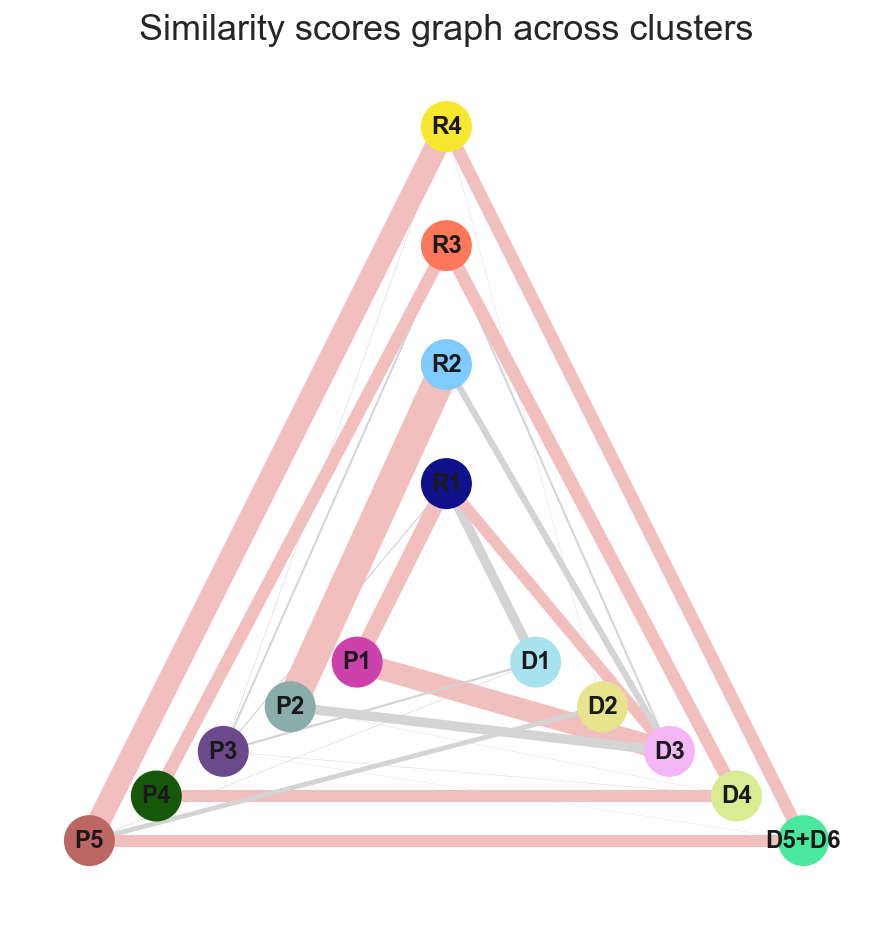

In [12]:
MyVisualization.plot_clusters_similarity_graph(nodes_df=clusters_df, edge_weights_df=similarity_scores_df, title='Similarity scores graph across clusters', file_name='similarity_scores_graph', thickness_scale=23, figure_width=6, figure_height=6, node_size=600, font_scale=.001)